### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

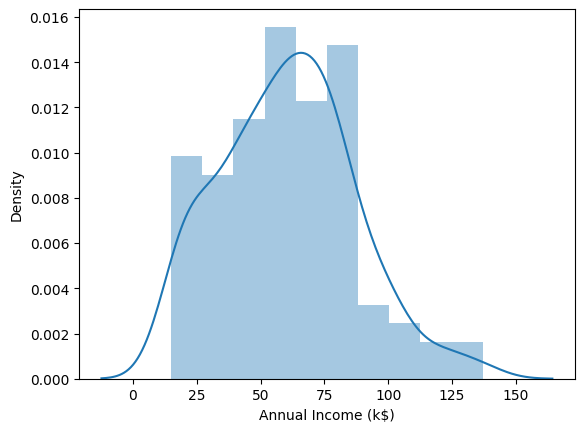

In [5]:
sns.distplot(df["Annual Income (k$)"])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

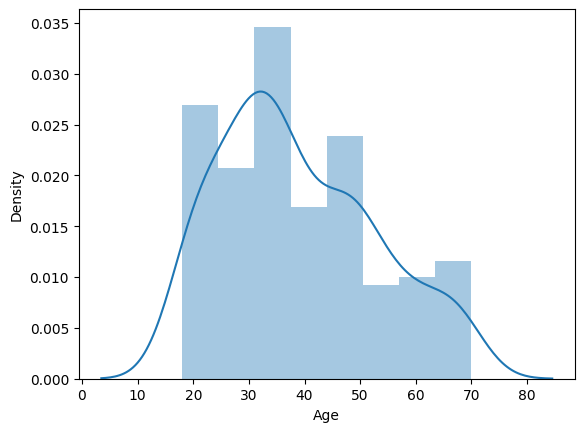

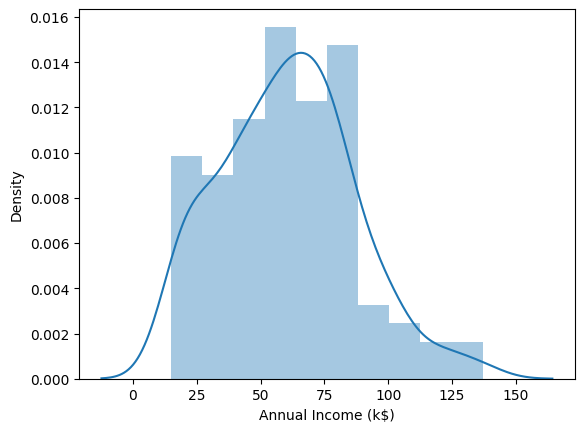

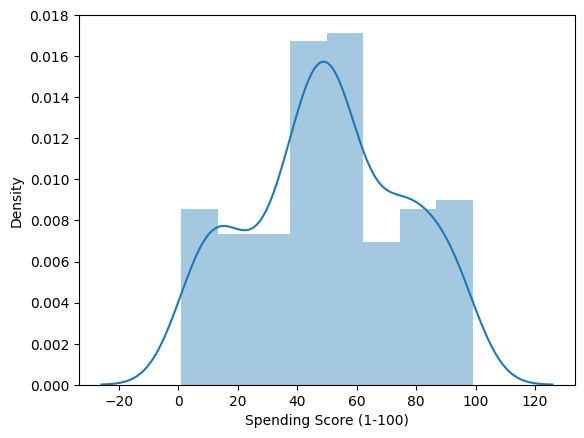

In [9]:
columns = ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

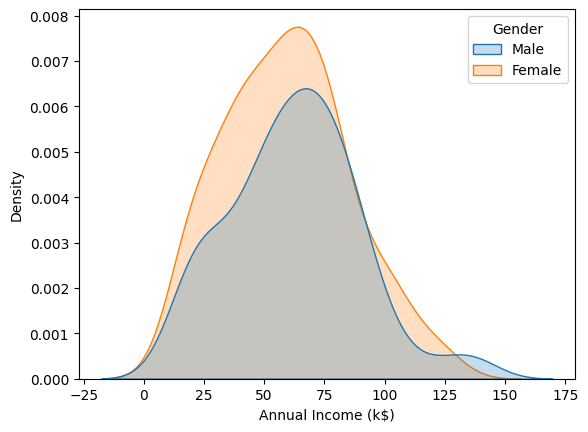

In [12]:
sns.kdeplot(
    data=df,
    x="Annual Income (k$)",
    hue="Gender",
    fill=True
)

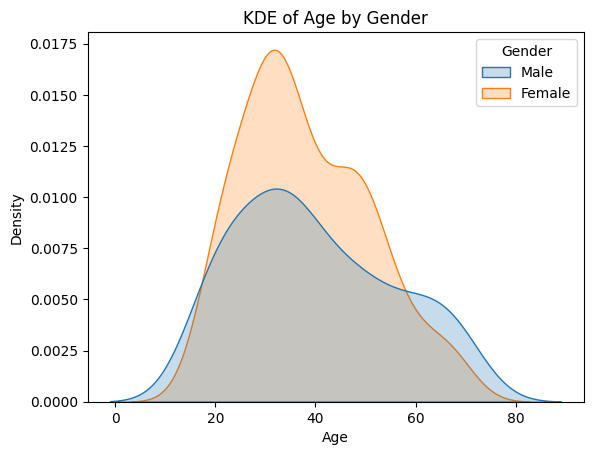

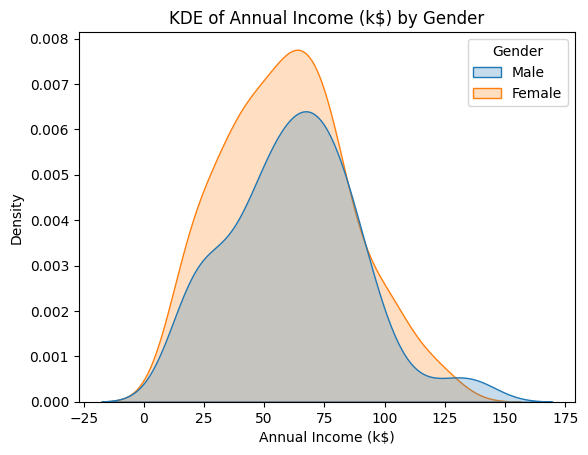

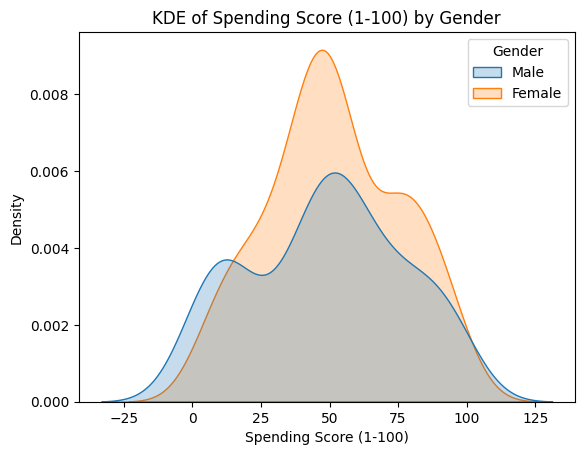

In [16]:
columns = ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(
        data=df,
        x=i,
        hue="Gender",
        fill=True
    )
    plt.title(f"KDE of {i} by Gender")
    plt.show()

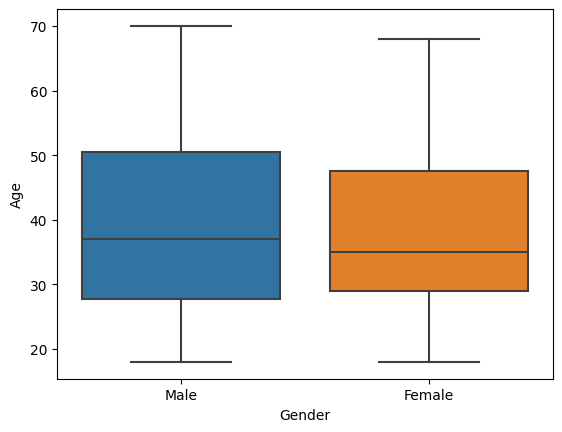

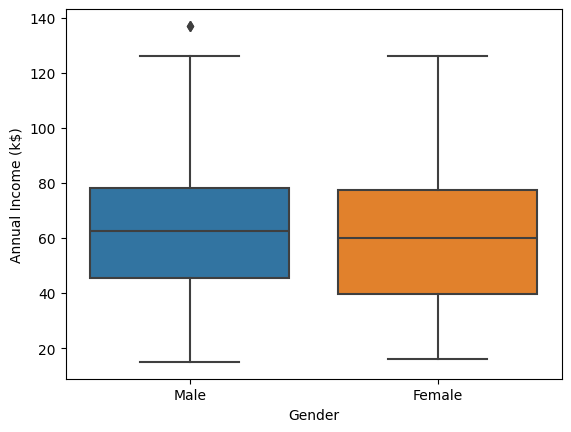

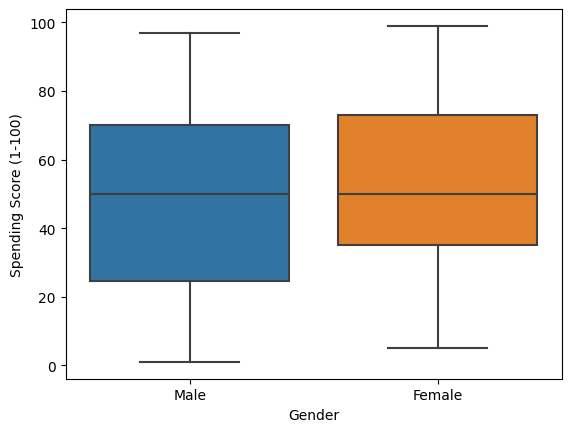

In [18]:
columns = ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(
        data=df,
        x="Gender",
        y=i,
    )
    plt.show()

In [21]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

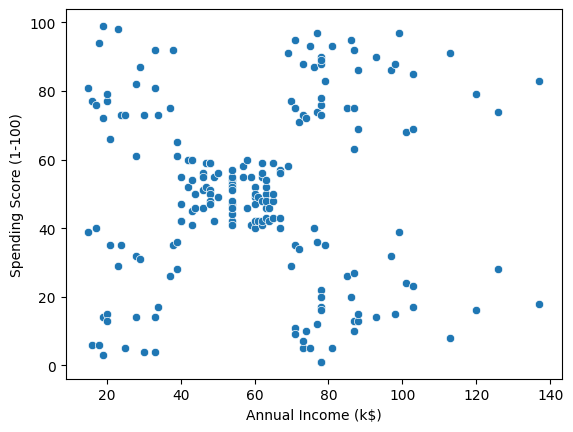

In [24]:
sns.scatterplot(data=df,x='Annual Income (k$)',y="Spending Score (1-100)")

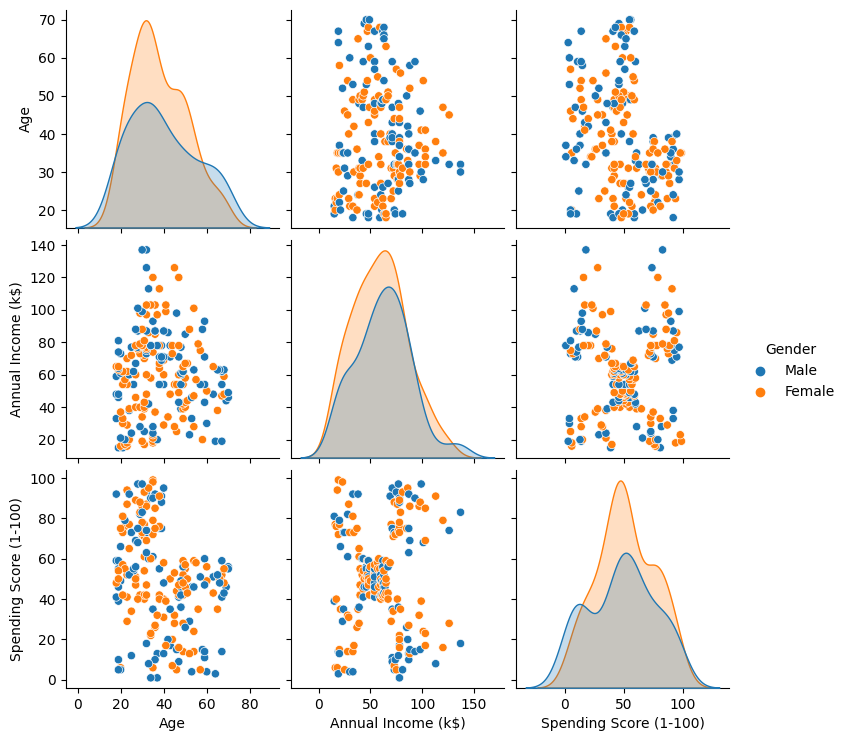

In [30]:
#df =df.drop('CustomerID',axis=1)
sns.pairplot(df,hue="Gender")

In [35]:
df.groupby("Gender")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [37]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

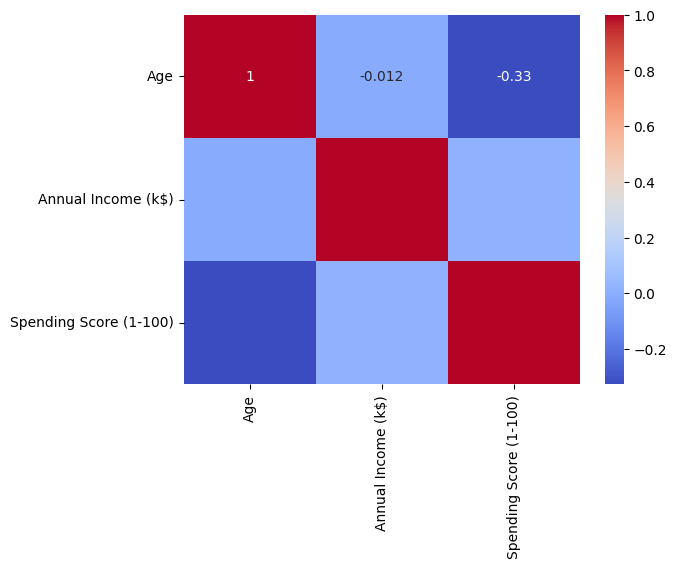

In [39]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

In [56]:
clustering1 = KMeans(n_clusters=3)

In [57]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [58]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [60]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [61]:
clustering1.inertia_

25640.45778439684

In [62]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [63]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8688.388977879482,
 5103.823725981623,
 4159.944391116133,
 3166.5033189033197,
 3042.0109919066454,
 1878.6955710955717]

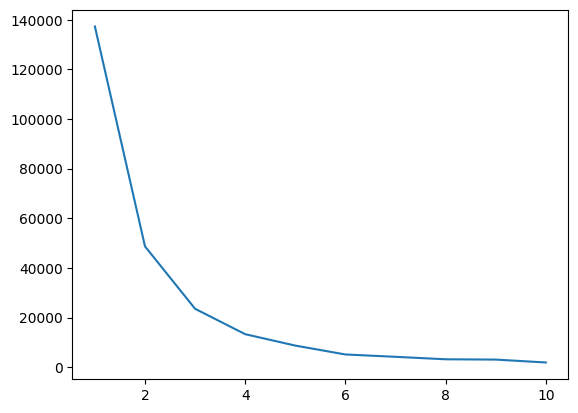

In [64]:
plt.plot(range(1,11),inertia_scores)

In [65]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [67]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


## Bivariate CLustering

In [75]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,4
2,Female,20,16,6,2,0
3,Female,23,16,77,2,4
4,Female,31,17,40,2,0


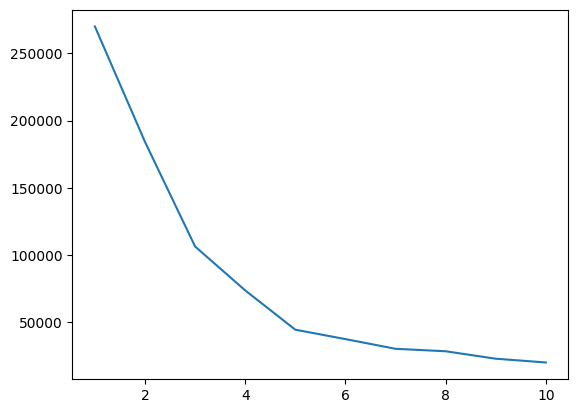

In [76]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [81]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

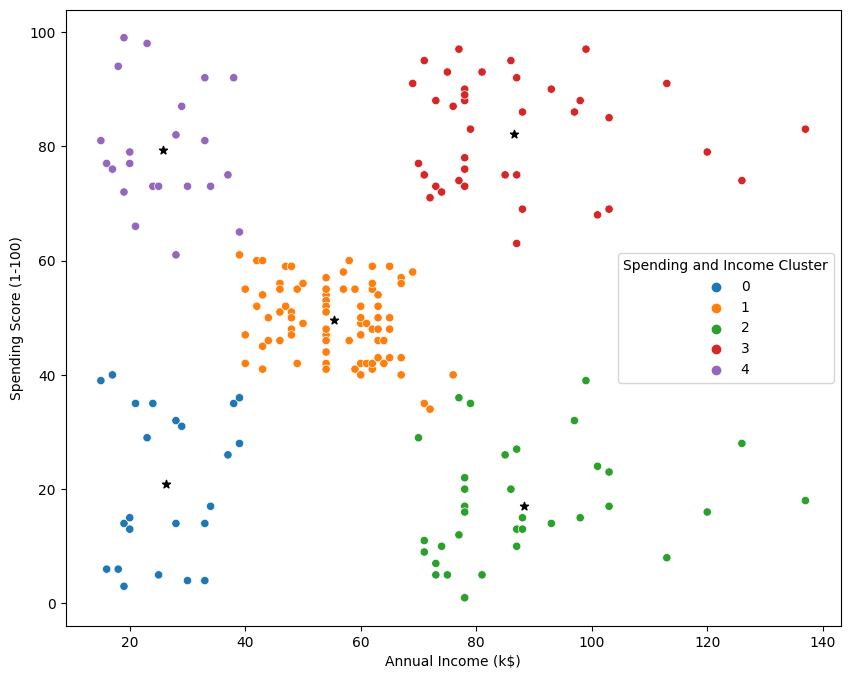

In [101]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette= 'tab10')
plt.savefig('clustering_bivariate.png')

In [83]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.457143,0.542857
3,0.538462,0.461538
4,0.590909,0.409091


In [85]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


## multivariance clustering

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scale = StandardScaler()

In [88]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,4
2,Female,20,16,6,2,0
3,Female,23,16,77,2,4
4,Female,31,17,40,2,0


In [89]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,0,True
1,21,15,81,2,4,True
2,20,16,6,2,0,False
3,23,16,77,2,4,False
4,31,17,40,2,0,False


In [90]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [91]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,19,15,39,2,0
1,21,15,81,2,4
2,20,16,6,2,0
3,23,16,77,2,4
4,31,17,40,2,0


In [92]:
dff = scale.fit_transform(dff)

In [97]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,1.362171,-1.477395
1,-1.281035,-1.738999,1.195704,1.362171,1.842593
2,-1.352802,-1.700830,-1.715913,1.362171,-1.477395
3,-1.137502,-1.700830,1.040418,1.362171,1.842593
4,-0.563369,-1.662660,-0.395980,1.362171,-1.477395


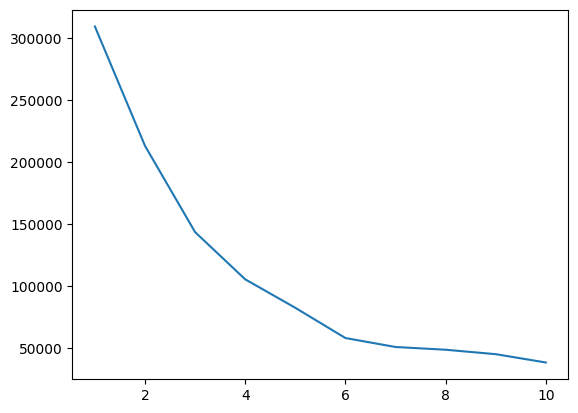

In [98]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [99]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,4
2,Female,20,16,6,2,0
3,Female,23,16,77,2,4
4,Female,31,17,40,2,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,3
196,Female,45,126,28,1,2
197,Male,32,126,74,1,3
198,Male,32,137,18,1,2


In [100]:
df.to_csv('Clustering.csv')

# Analysis
### Target Cluster
. Target group would be cluster 1 which has a high Spenmding Score and hgh income



. 59 percent of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketingh campaign targeting popular items in this cluster

. Cluster 2 presents an interesting an interesting opportunity to market to the customers for sales event on popular items.